### Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
coupons_dataframe = pd.read_csv('data/coupons.csv')

In [3]:
pd.set_option('display.max_columns', None)
coupons_dataframe.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
print(coupons_dataframe.isna().sum()/len(coupons_dataframe)*100)
coupons_dataframe.info()

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 co

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
#Rename the pasanger column to passenger
coupons_dataframe = coupons_dataframe.rename(columns={'passanger': 'passenger'})

#99% persent of the car column is NaN, dropping that column
coupons_dataframe = coupons_dataframe.drop(columns=["car"])

#Examine the values in the age column to see the possibility to conver that to numeric
print(coupons_dataframe["age"].value_counts(), coupons_dataframe["age"].value_counts()/len(coupons_dataframe)*100)

#Replace the 1788 (~14% of) rows with the value '50plus' to 51
coupons_dataframe.loc[coupons_dataframe["age"] == "50plus", "age"] = "51" 
#Replace the 547 (~4% of) rows with the value 'below21' to 20
coupons_dataframe.loc[coupons_dataframe["age"] == "below21", "age"] = "20" 

#convert it to numeric
coupons_dataframe['age'] = coupons_dataframe["age"].astype("int64")

print(coupons_dataframe['age'].describe())


age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64 age
21         20.916115
26         20.175024
31         16.075371
50plus     14.096500
36         10.398928
41          8.617155
46          5.408389
below21     4.312520
Name: count, dtype: float64
count    12684.000000
mean        32.437480
std         10.435134
min         20.000000
25%         21.000000
50%         31.000000
75%         41.000000
max         51.000000
Name: age, dtype: float64


4. What proportion of the total observations chose to accept the coupon?

In [6]:
#The propotion  of the total observations chose to accept the coupon can be calculate based on number of '1's in the column 'Y' divided by the total rows

print ((coupons_dataframe['Y'] == 1).sum()/len(coupons_dataframe) *100)

#In this case Proportion can be calculated using Mean
print('Proption of the total observatioons chose to accept the coupon : ', coupons_dataframe['Y'].mean())


56.84326710816777
Proption of the total observatioons chose to accept the coupon :  0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

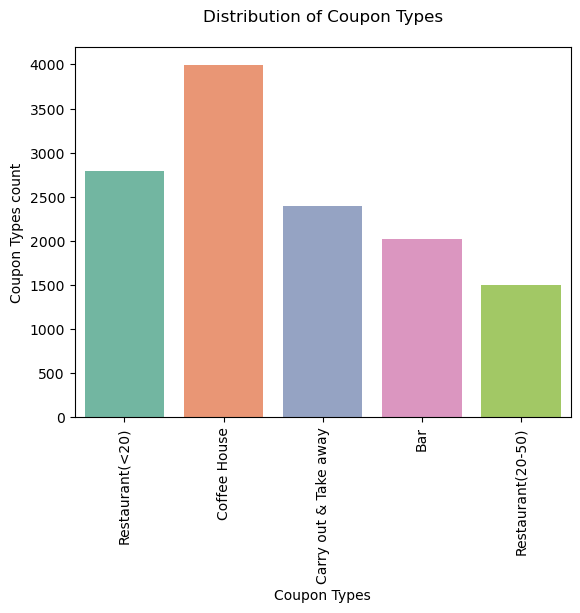

In [7]:
#Using Seaborn to plot the bar graoh on Coupon types

coupon_type_chart = sns.countplot(x='coupon', data=coupons_dataframe, hue='coupon', palette='Set2', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Coupon Types')
plt.ylabel('Coupon Types count')
plt.title('Distribution of Coupon Types\n')

#Saving it to disk
plt.savefig("images/coupon_types_plot.png")

6. Use a histogram to visualize the temperature column.

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
There are only three distinct values in the Temperature column. 30, 55 and 80. Therefore, to make the plot more readable reducingthe bins to 5.


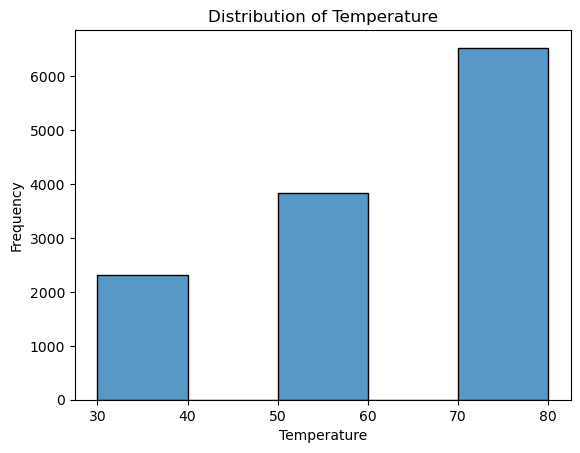

In [8]:
print(coupons_dataframe["temperature"].value_counts())
print('There are only three distinct values in the Temperature column. 30, 55 and 80. Therefore, to make the plot more readable reducingthe bins to 5.')

#Plot a histogram on distribution of temperature
sns.histplot(data=coupons_dataframe['temperature'], bins=5 )
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

#Saving it to disk
plt.savefig('images/distribution_of_temperature.png')



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
bar_coupons_dataframe = coupons_dataframe[coupons_dataframe['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [10]:
# Proportion accepted
print('Propotion of bar coupons accepted : ', bar_coupons_dataframe['Y'].mean())

print('\n 41% of the customers who were offered a bar coupon accepted it. lower than the overall average of 56%')

Propotion of bar coupons accepted :  0.41001487357461575

 41% of the customers who were offered a bar coupon accepted it. lower than the overall average of 56%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


The acceptance rate with customers visited the Bar 3 times or less :  37.061769616026716
The acceptance rate with customers visited the Bar more than 3 times :  76.88442211055276

The acceptance rate with customers visited the bar more 3 times is Twice as much as the customers visted the 3 times or less.

Only ~37% of the customers accepted the coupon in the first category(<= 3 times) whereas ~77% of the customers accepted the coupon in the second category (>3 times)


<BarContainer object of 2 artists>

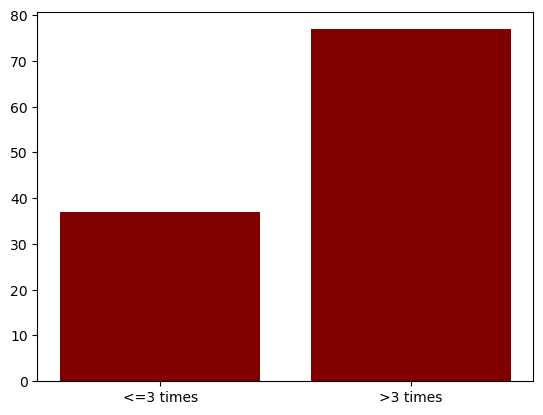

In [11]:
#Since the Bar columns is non-numeric, checking what categories of values in the column
bar_coupons_dataframe['Bar'].value_counts(dropna=False)

#There are 21 rows with Null value in the Bar column. Dropping them from the data set
bar_coupons_dataframe = bar_coupons_dataframe.dropna(subset=['Bar'])
#print(bar_coupons_dataframe['Bar'].value_counts(dropna=False))

# Customers went to a bar 3 or fewer times a month by including only three categories 'never', 'less1', '1~3'
fewer_than_3_or_less_times = bar_coupons_dataframe[bar_coupons_dataframe['Bar'].isin(['never', 'less1', '1~3'])]

# Group 2: went to a bar more than 3 times a month by including all values outside of the three categories 'never', 'less1', '1~3'
greater_than_3_times = bar_coupons_dataframe[bar_coupons_dataframe['Bar'].isin(['4~8', 'gt8'])]
#greater_than_3_times = bar_coupons_dataframe[~bar_coupons_dataframe['Bar'].isin(['never', 'less1', '1~3'])]

# Acceptance rates
print( "The acceptance rate with customers visited the Bar 3 times or less : ", fewer_than_3_or_less_times['Y'].mean()*100)
print( "The acceptance rate with customers visited the Bar more than 3 times : ",greater_than_3_times['Y'].mean()*100)

print('\nThe acceptance rate with customers visited the bar more 3 times is Twice as much as the customers visted the 3 times or less.')
print('\nOnly ~37% of the customers accepted the coupon in the first category(<= 3 times) whereas ~77% of the customers accepted the coupon in the second category (>3 times)')


plt.bar(['<=3 times', '>3 times'], [(fewer_than_3_or_less_times['Y'].mean()*100), (greater_than_3_times['Y'].mean()*100)], color='maroon')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


(1576, 25)
The acceptance rate with customers 25 years or older and visited the Bar at least once :  69.52380952380952
The acceptance rate with all other categories of customers :  33.43908629441624

The acceptance rate with customers 25 years or older and visited the Bar at least once is Twice as much as the other categories of customers.

~67% of the customers accepted the coupon in the first category(age>25 and bar vist>1) whereas only ~33% of the customers accepted the coupon in all other category 


<BarContainer object of 2 artists>

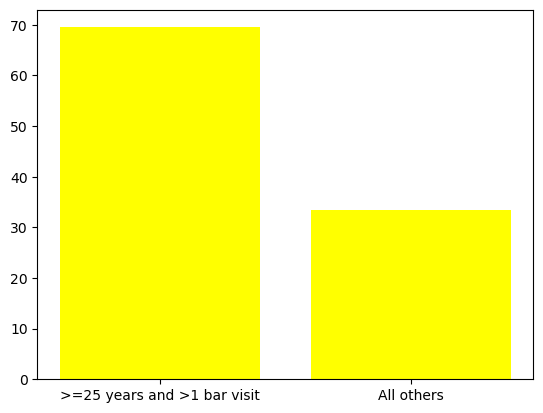

In [12]:
# Customers who go the bar more than once amonth and over 25 (I assume this is monthly data)
customers_greaterthan_25_and_morethan_1_bar_visit = bar_coupons_dataframe[bar_coupons_dataframe['Bar'].isin(['1~3', '4~8', 'gt8']) & 
                                                                          (bar_coupons_dataframe['age'] > 25) ]

####print(customers_greaterthan_25_and_morethan_1_bar_visit['age'].value_counts())

# all other customers
all_other_customers = bar_coupons_dataframe[~(bar_coupons_dataframe['Bar'].isin(['1~3', '4~8', 'gt8']) & 
                                              (bar_coupons_dataframe['age'] > 25))]

print(all_other_customers.shape)

# Acceptance rates
print( "The acceptance rate with customers 25 years or older and visited the Bar at least once : ", 
      customers_greaterthan_25_and_morethan_1_bar_visit['Y'].mean()*100)
print( "The acceptance rate with all other categories of customers : ", 
      all_other_customers['Y'].mean()*100)

print('\nThe acceptance rate with customers 25 years or older and visited the Bar at least once is Twice as much as the other categories of customers.')
print('\n~67% of the customers accepted the coupon in the first category(age>25 and bar vist>1) whereas only ~33% of the customers accepted the coupon in all other category ')

plt.bar(['>=25 years and >1 bar visit', 'All others'], [(customers_greaterthan_25_and_morethan_1_bar_visit['Y'].mean()*100), (all_other_customers['Y'].mean()*100)], color='yellow')


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


The acceptance rate with customers visited the Bar at least once, no kid in the car and not from Farming Fishing & Forestry :  71.32486388384754
The acceptance rate with all other categories of cusotmers :  29.48096885813149

The acceptance rate with customers visited the Bar at least once, no kid in the car and not from Farming Fishing & Forestry is more than Twice as much as the other categories of customers.

~71% of the cusotmers accepted the coupon in the first category(bar vist>1, no kid in the car and not from customers visited the Bar at least once, no kid in the car and  not from Farming Fishing & Forestry whereas only ~29% of the customers accepted the coupon in all other category 


<BarContainer object of 2 artists>

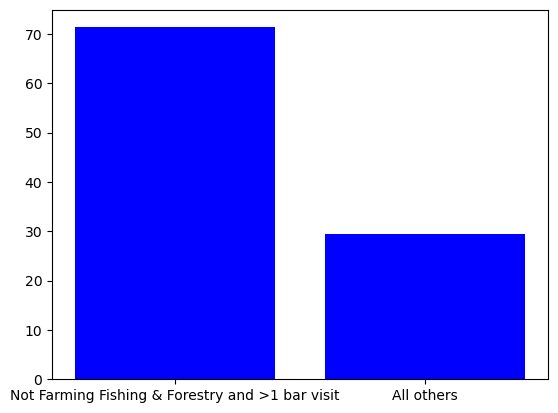

In [13]:
#bar_coupons_dataframe['passenger'].value_counts(dropna=False)
bar_coupons_dataframe['occupation'].value_counts(dropna=False)

#Create a subet for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
bar_coupons_dataframe_subset = bar_coupons_dataframe[ bar_coupons_dataframe['Bar'].isin(['1~3', '4~8', 'gt8'])  & 
                                                        (bar_coupons_dataframe['passenger'] != 'Kid(s)') & 
                                                        (bar_coupons_dataframe['occupation'] != 'Farming Fishing & Forestry')]

#All other categories of customers
all_other_customers_2 = bar_coupons_dataframe[ ~(bar_coupons_dataframe['Bar'].isin(['1~3', '4~8', 'gt8'])  & 
                                                        (bar_coupons_dataframe['passenger'] != 'Kid(s)') & 
                                                        (bar_coupons_dataframe['occupation'] != 'Farming Fishing & Forestry'))]

print( "The acceptance rate with customers visited the Bar at least once, no kid in the car and not from Farming Fishing & Forestry : ", 
      bar_coupons_dataframe_subset['Y'].mean()*100)
print( "The acceptance rate with all other categories of cusotmers : ", 
      all_other_customers_2['Y'].mean()*100)

print('\nThe acceptance rate with customers visited the Bar at least once, no kid in the car and not from Farming Fishing & Forestry is more than Twice as much as the other categories of customers.\n')
print('~71% of the cusotmers accepted the coupon in the first category(bar vist>1, no kid in the car and not from customers visited the Bar at least once, no kid in the car and  not from Farming Fishing & Forestry whereas only ~29% of the customers accepted the coupon in all other category ')

plt.bar(['Not Farming Fishing & Forestry and >1 bar visit', 'All others'], [(bar_coupons_dataframe_subset['Y'].mean()*100), (all_other_customers_2['Y'].mean()*100)], color='blue')


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



(5152, 25)
The acceptance rate with first category of customers :  60.53959627329193
The acceptance rate with second category of customers :  54.31492299522039


<BarContainer object of 2 artists>

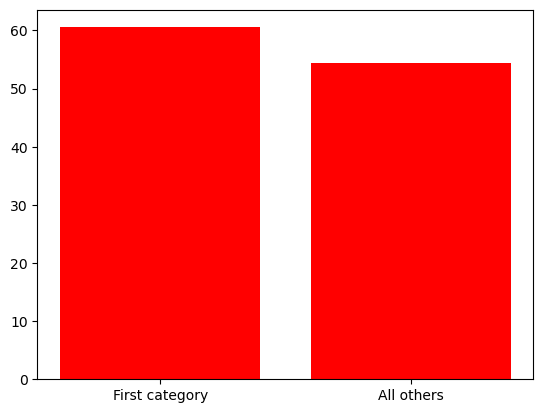

In [14]:
#bar_coupons_dataframe['maritalStatus'].value_counts(dropna=False)
#print(bar_coupons_dataframe['income'].value_counts(dropna=False))

# Category 1 : go to bars more than once a month, had passengers that were not a kid, and were not widowed 
category_1_subset = coupons_dataframe[ ((coupons_dataframe['Bar'].isin(['1~3', '4~8', 'gt8'])  & 
                                                        (((coupons_dataframe['passenger'] != 'Kid(s)') & 
                                                        (coupons_dataframe['maritalStatus'] != 'Widowed')) |
                                                        (coupons_dataframe['age'] < 30) )) |
                                                        (coupons_dataframe['RestaurantLessThan20'].isin(['4~8', 'gt8'])  & 
                                                        (coupons_dataframe['income'].isin(['$25000 - $37499', '$12500 - $24999', 
                                                                                              '$37500 - $49999', 'Less than $12500'])))
                                           )]
                                         

print(category_1_subset.shape)
#print(category_1_subset['Bar'].value_counts(dropna=False))
#print(category_1_subset['age'].value_counts(dropna=False))
#print(bar_coupons_dataframe['passenger'].value_counts(dropna=False))

# Category 2 : go to bars more than once a month and are under the age of 30
category_2_subset = coupons_dataframe[~(((coupons_dataframe['Bar'].isin(['1~3', '4~8', 'gt8'])  & 
                                                        (((coupons_dataframe['passenger'] != 'Kid(s)') & 
                                                        (coupons_dataframe['maritalStatus'] != 'Widowed')) |
                                                        (coupons_dataframe['age'] < 30) )) |
                                                        (coupons_dataframe['RestaurantLessThan20'].isin(['4~8', 'gt8'])  & 
                                                        (coupons_dataframe['income'].isin(['$25000 - $37499', '$12500 - $24999', 
                                                                                              '$37500 - $49999', 'Less than $12500'])))
                                           )) ] 

print( "The acceptance rate with first category of customers : ", 
      category_1_subset['Y'].mean()*100)
print( "The acceptance rate with second category of customers : ", 
      category_2_subset['Y'].mean()*100)

plt.bar(['First category', 'All others'], [(category_1_subset['Y'].mean()*100), (category_2_subset['Y'].mean()*100)], color='red')



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [17]:
print('Based on the analysis peformed, overall observations for Bar coupon customers are :\n')

print('Customers older than 25 years of age with less $50k income and visting the bar more frequently bar-goers tend to accept the coupons more frequently.\n')

print('1. Customers who visit bars more than 3 times per month have roughly double the acceptance rate (76%) compared to other customers who go 3 or fewer times (~37%).\n')

print('2. Among the Customers visiting the bar more than once, customers over the age of 25 tend to acceptance the coupons twice (~69%) as much as the customers below the age of 25 (~33%).\n')

print('3. Customers visited the Bar at least once with no kid in the car and not from Farming Fishing & Forestry occupation has accepted the coupons more than twice (~71%) as much as the other categories of customers (~29%).\n')


Based on the analysis peformed, overall observations for Bar coupon customers are :

Customers older than 25 years of age with less $50k income and visting the bar more frequently bar-goers tend to accept the coupons more frequently.

1. Customers who visit bars more than 3 times per month have roughly double the acceptance rate (76%) compared to other customers who go 3 or fewer times (~37%).

2. Among the Customers visiting the bar more than once, customers over the age of 25 tend to acceptance the coupons twice (~69%) as much as the customers below the age of 25 (~33%).

3. Customers visited the Bar at least once with no kid in the car and not from Farming Fishing & Forestry occupation has accepted the coupons more than twice (~71%) as much as the other categories of customers (~29%).



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [18]:
#print(coupons_dataframe['coupon'].value_counts(dropna=False))

#Create a subset of dataframe for the coupon = 'Coffee Hosue'
coffee_house_dataframe = coupons_dataframe[coupons_dataframe['coupon']=='Coffee House']

#print(coffee_house_dataframe['passeanger'].value_counts(dropna=False))

#print(coffee_house_dataframe['passenger'].value_counts(dropna=False))
# Category 1 : Customers alone
coffee_house_cat_1 = coffee_house_dataframe[coffee_house_dataframe['passenger'] == 'Alone']

# Category 2 : Customers with Friends as passengers
coffee_house_cat_2 = coffee_house_dataframe[coffee_house_dataframe['passenger'] == 'Friend(s)']

# Category 3 : Customers with partners as passengers
coffee_house_cat_3 = coffee_house_dataframe[coffee_house_dataframe['passenger'] == 'Partner']

# Category 4 : Customers with Kids as passengers
coffee_house_cat_4 = coffee_house_dataframe[coffee_house_dataframe['passenger'] == 'Kid(s)']

#Calculate the acceptance rate for different passenger categories
print( "The acceptance rate with first category of customers : ", 
      coffee_house_cat_1['Y'].mean()*100)
print( "The acceptance rate with second category of customers : ", 
      coffee_house_cat_2['Y'].mean()*100)
print( "The acceptance rate with third category of customers : ", 
      coffee_house_cat_3['Y'].mean()*100)
print( "The acceptance rate with fourth category of customers : ", 
      coffee_house_cat_4['Y'].mean()*100)

# Category 5 : Customers alone with driver over 25 years
coffee_house_cat_5 = coffee_house_dataframe[ (coffee_house_dataframe['passenger'] == 'Alone') & (coffee_house_dataframe['age'] > 25)]

# Category 6 : Customers with Friends as passengers with driver over 25 years
coffee_house_cat_6 = coffee_house_dataframe[(coffee_house_dataframe['passenger'] == 'Friend(s)') & (coffee_house_dataframe['age'] > 25)]

# Category 7 : Customers with partners as passengers with driver over 25 years
coffee_house_cat_7 = coffee_house_dataframe[(coffee_house_dataframe['passenger'] == 'Partner') & (coffee_house_dataframe['age'] > 25)]

# Category 8 : Customers with Kids as passengers with driver over 25 years
coffee_house_cat_8 = coffee_house_dataframe[(coffee_house_dataframe['passenger'] == 'Kid(s)') & (coffee_house_dataframe['age'] > 25)]

#print(coffee_house_cat_1.shape)

#Calculate the acceptance rate for different passenger categories
print( "\n\n\nThe acceptance rate with first category of customers with driver Age over 25 : ", 
      coffee_house_cat_5['Y'].mean()*100)
print( "The acceptance rate with second category of customers with driver Age over 25 : ", 
      coffee_house_cat_6['Y'].mean()*100)
print( "The acceptance rate with third category of customers with driver Age over 25 : ", 
      coffee_house_cat_7['Y'].mean()*100)
print( "The acceptance rate with fourth category of customers with driver Age over 25 : ", 
      coffee_house_cat_8['Y'].mean()*100)

print('\n\nBased on the analysis peformed, overall observations for Bar coupon customers are :\n')
print('Customers with Friends and Partners in the car tend to accept the Coffee House coupons compared to customers alone in the car.\n')
print('Similarly, customers with kids in the car tend to accept the coupons at a higher rate (~5%) compared to the customers alone.\n')
print('Finally, the acceptance rate did not change much with drivers over 25 for the same categories.')

The acceptance rate with first category of customers :  43.794326241134755
The acceptance rate with second category of customers :  59.69055374592834
The acceptance rate with third category of customers :  57.049180327868854
The acceptance rate with fourth category of customers :  48.309178743961354



The acceptance rate with first category of customers with driver Age over 25 :  41.88292094146047
The acceptance rate with second category of customers with driver Age over 25 :  58.118701007838744
The acceptance rate with third category of customers with driver Age over 25 :  57.72727272727273
The acceptance rate with fourth category of customers with driver Age over 25 :  44.680851063829785


Based on the analysis peformed, overall observations for Bar coupon customers are :

Customers with Friends and Partners in the car tend to accept the Coffee House coupons compared to customers alone in the car.

Similarly, customers with kids in the car tend to accept the coupons at a higher rate